# Topic Modeling on IoT News

This exercise is inspired from the tutorial by Sibanjan Das at DZone and the brilliant article at Machine Learning Plus. For the reference to the exact articles, please go through the Reference section at the end.


## Using Topic Modeling to classify various IoT news

We are going to demonstrate the use of Topic Modeling to categorize various news in the IoT space. The news pieces would give us an idea about the popularity of specific topics in the IoT world. The news pieces are taken from "iotbusinessnews.com". The presented exercise is only meant for educational purposes. 

Problem Statement: Identify the trending topics from latest news in the IoT space.

Assumptions:
    1. The news pieces in the data folder are considered the entire set for the purpose of this exercise. So, any insights that are generated apply to this set and this needs to be considered when looking at them.
    2. The inherent bias in the publication of specific articles at www.iotbusinessnews.com also needs to be considered.

Approach:
    1. Retrieve text articles from the news website into separate text files with name "text_<category>_<number>_<date of publication>.txt"
    2. Prepare data for the model along with the necessary documentation in Jupyter notebook
    3. Run the LDAmodel on the text files
    4. Generate insights
    5. Suggest further work

### Retrieve text articles from the news website

This step has already been performed. For educational purpose, we only use eight text files and these have been created manually. The news pieces were accessed on 1st May 2019 from the website "iotbusinessnews.com" under the category "Industrial IoT". Techniques such as web scraping and even, neural networks can be used to create these files at scale.

The files are stored in the data folder under the parent folder where this Notebook resides.

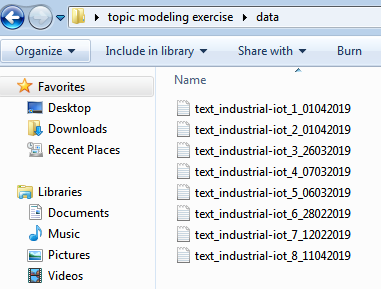

### Prepare the data for the model

We first import the necessary libraries.

In [2]:
import os

import numpy as np
import pandas as pd

import re
import string

# NLTK Stop words

import nltk
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from nltk.stem import WordNetLemmatizer

# Gensim

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plots

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt

%matplotlib inline

#### Side Note on Gensim and pyLDAvis

Gensim is a free python library used for topic modeling. You can explore more at https://radimrehurek.com/gensim/index.html

pyLDAvis is a library for interactive topic model visualization. You can explore more at https://pyldavis.readthedocs.io/en/latest/readme.html#usage



Next step is to read in the files and do some basic data cleansing.

In [71]:
cwd = os.getcwd() # get current directory which will be used to prepend to the data folder

path = cwd + '\\data'  
# print(path) # for debug purpose

filesdata = []

fileList = os.listdir(path)

for i in fileList:
    file = open(os.path.join(path+'/'+ i), 'r', encoding = 'utf8')

    data = file.readlines()
    data = [re.sub(r'\s+',' ', sent) for sent in data]
    data = [re.sub(r'\'', '', sent) for sent in data]
    data = [x for x in data if x != ' ']
    data = gensim.utils.simple_preprocess(str(data), deacc=True)
    filesdata.append(data)
    
#print(filesdata[7]) # check if the last file was read

Next step is to create tokens after getting rid of stopwords.

In [100]:
stopwords_punct = set(stopwords.words('english')).union(string.punctuation).union('-')

data_tokens_no_stopwords = []
for data in filesdata:
    data_stopwords_rm = [word for word in data if word.lower() not in stopwords_punct]
    data_tokens_no_stopwords.append(data_stopwords_rm)
    
#data_tokens_no_stopwords # for debug purpose

The next step is to stem the tokens. There are two popular ways to do this - Stemming and Lemmatized. We use the Lemmatized form.

In [95]:
wordnet_lemmatizer = WordNetLemmatizer()

data_lemmatized = []

for w in data_tokens_no_stopwords:
    data_lemmatized.append([word for word in map(wordnet_lemmatizer.lemmatize, w)]) # did not work

data_lemmatized  # for debug purpose

[['ptc',
  'improves',
  'workforce',
  'efficiency',
  'launch',
  'vuforia',
  'expert',
  'capture',
  'ar',
  'solution',
  'providing',
  'faster',
  'efficient',
  'way',
  'empower',
  'front',
  'line',
  'worker',
  'ptc',
  'today',
  'announced',
  'hannover',
  'messe',
  'release',
  'vuforia',
  'expert',
  'capture',
  'augmented',
  'reality',
  'ar',
  'solution',
  'designed',
  'improve',
  'workforce',
  'productivity',
  'quality',
  'safety',
  'compliance',
  'vuforia',
  'expert',
  'capture',
  'provides',
  'industrial',
  'enterprise',
  'faster',
  'efficient',
  'way',
  'empower',
  'front',
  'line',
  'worker',
  'relevant',
  'information',
  'need',
  'get',
  'job',
  'done',
  'quickly',
  'accurately',
  'first',
  'time',
  'major',
  'skill',
  'gap',
  'threatening',
  'manufacturing',
  'industry',
  'effective',
  'knowledge',
  'transfer',
  'existing',
  'subject',
  'matter',
  'expert',
  'smes',
  'critical',
  'next',
  'decade',
  'milli

In [96]:
# Create Corpus

dictionary = corpora.Dictionary(data_lemmatized) # traverses each document and assigns a unique id to each unique token along with their counts.

corpus = [dictionary.doc2bow(text) for text in data_lemmatized] # convert to bag of words

# print(corpus) # for debug purpose

### Run the LDAmodel

In [108]:
# Build LDA model

ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=20, alpha='auto', per_word_topics=True)

In [109]:
# Calculate accuracy of model by using perplexity metric. 

print('Perplexity: ', ldamodel.log_perplexity(corpus)) # The lower the value, better is the model.

Perplexity:  -6.613550819456577


### Generate insights

Now, we will visualize the model using pyLDAvis. 

It is an interactive plot, where each bubble represents a topic.

A good topic model will have large non-overlapping bubbles in the chart. The bar plot one right-hand side of the screenshot shows the frequency of the terms in the topic, out of the total term frequency in the documents. 

In [110]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      40.244061        1       1 -0.155383  0.037640
4      19.222366        1       2 -0.020262 -0.158652
3      17.675069        1       3  0.061074  0.037422
1      12.131465        1       4  0.010943  0.089699
2      10.727038        1       5  0.103628 -0.006109, topic_info=     Category       Freq          Term      Total  loglift  logprob
term                                                               
420   Default  18.000000        sensor  18.000000  30.0000  30.0000
264   Default  18.000000      ericsson  18.000000  29.0000  29.0000
576   Default   7.000000     vocalzoom   7.000000  28.0000  28.0000
112   Default  25.000000    industrial  25.000000  27.0000  27.0000
575   Default   6.000000     vibration   6.000000  26.0000  26.0000
707   Default   9.000000       company   9.000000  25.0000  25.0000
178   Default  11.000000          said  11.000000  24.0000  24.0000
316   Default  23.000000    technology  23.000000  23.0000  23.0000
937   Default   6.000000         china   6.000000  22.0000  22.0000
498   Default  20.000000          iiot  20.000000  21.0000  21.0000
466   Default  28.000000          data  28.000000  20.0000  20.0000
342   Default   8.000000       connect   8.000000  19.0000  19.0000
221   Default   7.000000           abb   7.000000  18.0000  18.0000
897   Default   6.000000         space   6.000000  17.0000  17.0000
870   Default   4.000000       nardini   4.000000  16.0000  16.0000
905   Default   4.000000          tata   4.000000  15.0000  15.0000
129   Default   5.000000   maintenance   5.000000  14.0000  14.0000
74    Default   5.000000     equipment   5.000000  13.0000  13.0000
281   Default  19.000000           iot  19.000000  12.0000  12.0000
113   Default  20.000000      industry  20.000000  11.0000  11.0000
230   Default  10.000000    automation  10.000000  10.0000  10.0000
246   Default   9.000000  connectivity   9.000000   9.0000   9.0000
784   Default  14.000000     thingworx  14.000000   8.0000   8.0000
272   Default   6.000000      flexible   6.000000   7.0000   7.0000
10    Default  11.000000          also  11.000000   6.0000   6.0000
377   Default  10.000000       machine  10.000000   5.0000   5.0000
840   Default   4.000000         fleet   4.000000   4.0000   4.0000
53    Default   7.000000        device   7.000000   3.0000   3.0000
38    Default   7.000000          cost   7.000000   2.0000   2.0000
216   Default  16.000000        worker  16.000000   1.0000   1.0000
...       ...        ...           ...        ...      ...      ...
891    Topic5   2.432913     satellite   3.699261   1.8134  -4.8080
887    Topic5   0.695182          rest   1.266124   1.6329  -6.0607
838    Topic5   0.695182      flagship   1.266123   1.6329  -6.0607
859    Topic5   0.695179          last   1.266125   1.6329  -6.0607
846    Topic5   0.695173       gateway   1.266125   1.6328  -6.0607
827    Topic5   0.695165        coming   1.266128   1.6328  -6.0607
813    Topic5   0.695160         apple   1.266128   1.6328  -6.0607
882    Topic5   0.695158      register   1.266131   1.6328  -6.0607
886    Topic5   0.695155     residency   1.266130   1.6328  -6.0607
505    Topic5   1.274451            le   2.454843   1.5769  -5.4546
178    Topic5   5.329240          said  11.981892   1.4222  -4.0239
53     Topic5   3.591803        device   7.998991   1.4317  -4.4184
139    Topic5   3.012293       million   6.649228   1.4406  -4.5944
707    Topic5   4.170725       company   9.747789   1.3835  -4.2690
855    Topic5   1.274238      interest   2.540069   1.5426  -5.4547
225    Topic5   1.274275         allow   2.557417   1.5358  -5.4547
149    Topic5   1.853913           one   3.957472   1.4741  -5.0798
50     Topic5   1.853743        demand   3.957508   1.4740  -5.0799
281    Topic5   5.328872           iot  19.737589   0.9230  -4.0239
38     Topic5   2.433125          cost   7.

### Further work

We can look at following improvements:
    1. Improve stemming
    2. Separate model into separate python file and call it from the notebook
    3. Identify which topics are prominent in which document
    4. Add visualizations based on Machine Learning Plus

#### References:

1. "Interactive Topic Modeling Using Python" at https://dzone.com/articles/interactive-topic-modeling-using-python
2. "Topic modeling visualization – How to present the results of LDA models?" https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/